In [35]:
import pymc as pm
import arviz as az
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d as plt3d
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

In [28]:
RANDOM_SEED = 10 
rng = np.random.default_rng(RANDOM_SEED)

In [24]:
# Set up grid for plotting. 
n_grid = 50
x1_grid = np.linspace(-1, 1, num=n_grid)
x2_grid = np.linspace(-1, 1, num=n_grid)
x_grid = np.meshgrid(x1_grid, x2_grid)
X = np.array([(x1, x2) for x1 in x1_grid for x2 in x2_grid])

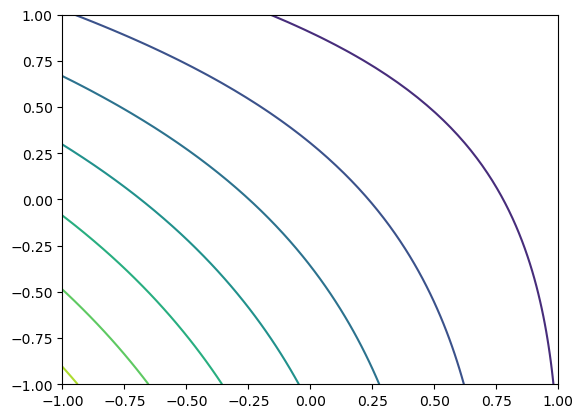

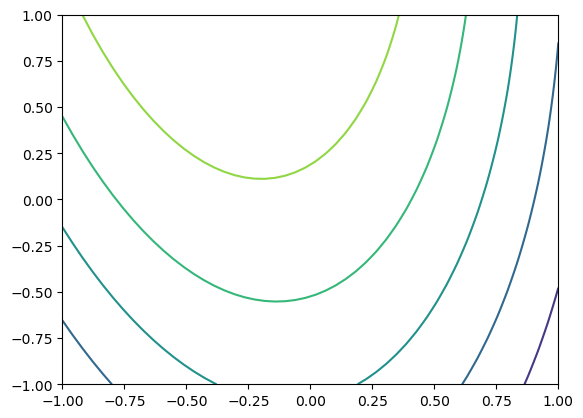

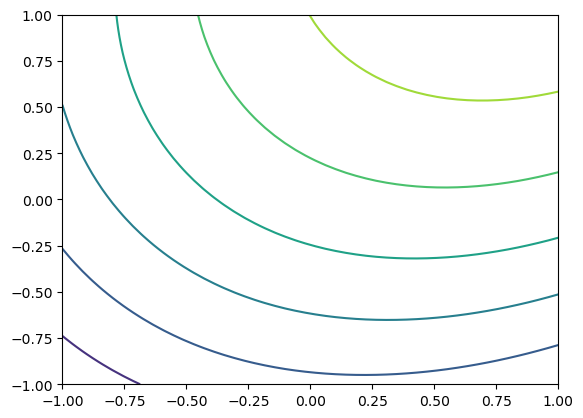

In [50]:
# Plot prior draws from quadratic kernel.
alpha = 3.0
offset = 3.0 
center = np.array([0.5, 0.5])
n_draws = 3

# Kernel. 
cov_func = alpha**2 * pm.gp.cov.Polynomial(2, c=center, d=2, offset=offset)

# Mean function. 
mean_func = pm.gp.mean.Zero()

# Sample and plot. 
prior_draws = pm.draw(pm.MvNormal.dist(mu=mean_func(X), cov=cov_func(X)), n_draws, random_seed=rng)
for i in range(n_draws):
    plt.contour(x_grid[0], x_grid[1], prior_draws[i,:].reshape(n_grid, n_grid))
    plt.show()

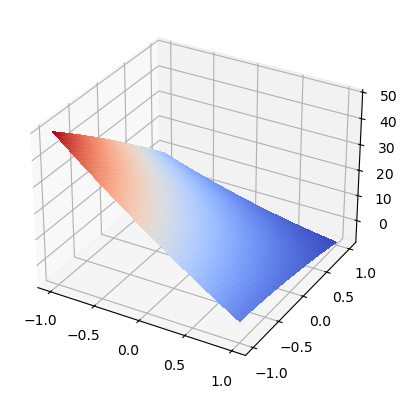

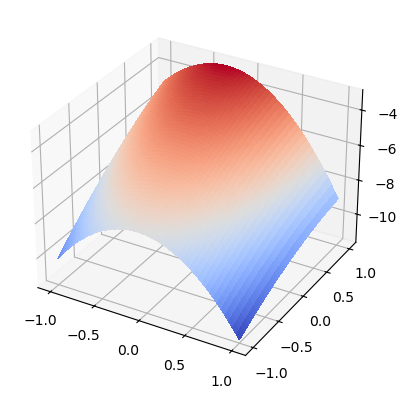

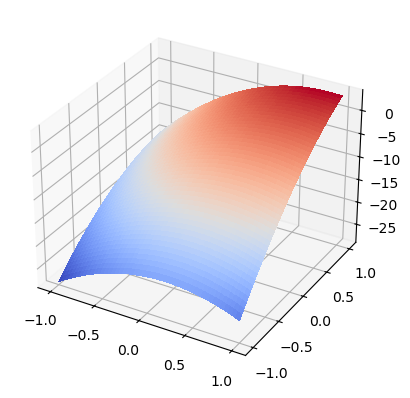

In [51]:
# 3d surface plots. 

for i in range(n_draws):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X=x_grid[0], Y=x_grid[1], Z=prior_draws[i,:].reshape(n_grid, n_grid), cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.show()
